<a href="https://colab.research.google.com/github/kkaan1907/datavisualization/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!git clone https://github.com/kkaan1907/datavisualization.git
data = pd.read_csv('/content/datavisualization/ecommerce_sales_analysis.csv')
data.head()

fatal: destination path 'datavisualization' already exists and is not an empty directory.


,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


First Question's Answer

<ipython-input-45-fe03a78642ef>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



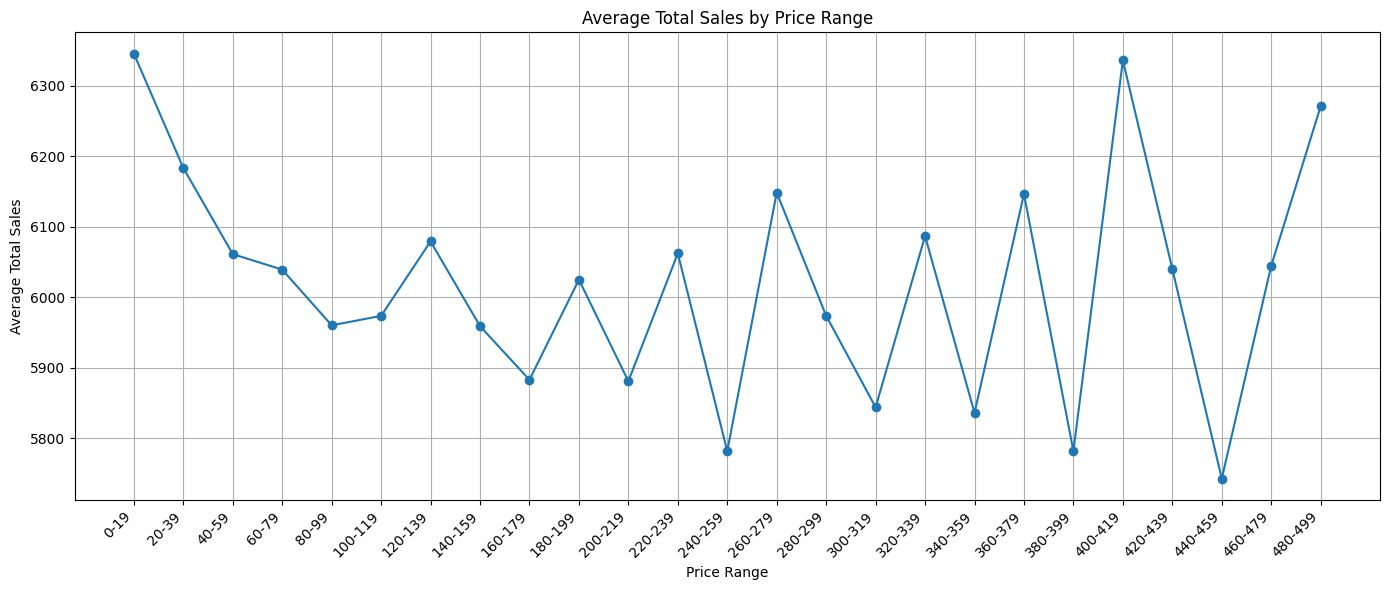

In [ ]:
sales_columns = data.columns[6:]

for col in sales_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['total_sales'] = data.iloc[:, 6:].sum(axis=1)


max_price = data['price'].max()
num_bins = (max_price + 20 -1 ) // 20
bins = list(range(0, int(max_price) + 20, 20))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)



price_range_sales = data.groupby('price_range')['total_sales'].mean()


plt.figure(figsize=(14, 6))
plt.plot(price_range_sales.index, price_range_sales.values, marker='o', linestyle='-')
plt.xlabel('Price Range')
plt.ylabel('Average Total Sales')
plt.title('Average Total Sales by Price Range')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Second Question's Answer


In [ ]:

import plotly.graph_objects as go



sales_columns = [col for col in data.columns if col.startswith('sales_month_')]

for col in sales_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['total_sales'] = data[sales_columns].sum(axis=1)
category_sales = data.groupby('category')['total_sales'].sum().sort_values(ascending=False)

fig = go.Figure(go.Bar(
        x=category_sales.values,
        y=category_sales.index.tolist(),
        orientation='h',
        marker_color='skyblue'
))

fig.update_layout(
   title='Total Sales by Product Categories (Horizontal Bar Chart )',
   xaxis_title='Total Sales',
   yaxis_title='Categories',
   title_font=dict(size=16, color='#003366'),
   plot_bgcolor='#f0f0f0',
    paper_bgcolor='#ffffff'

    )
fig.show()




Third Question's Answer

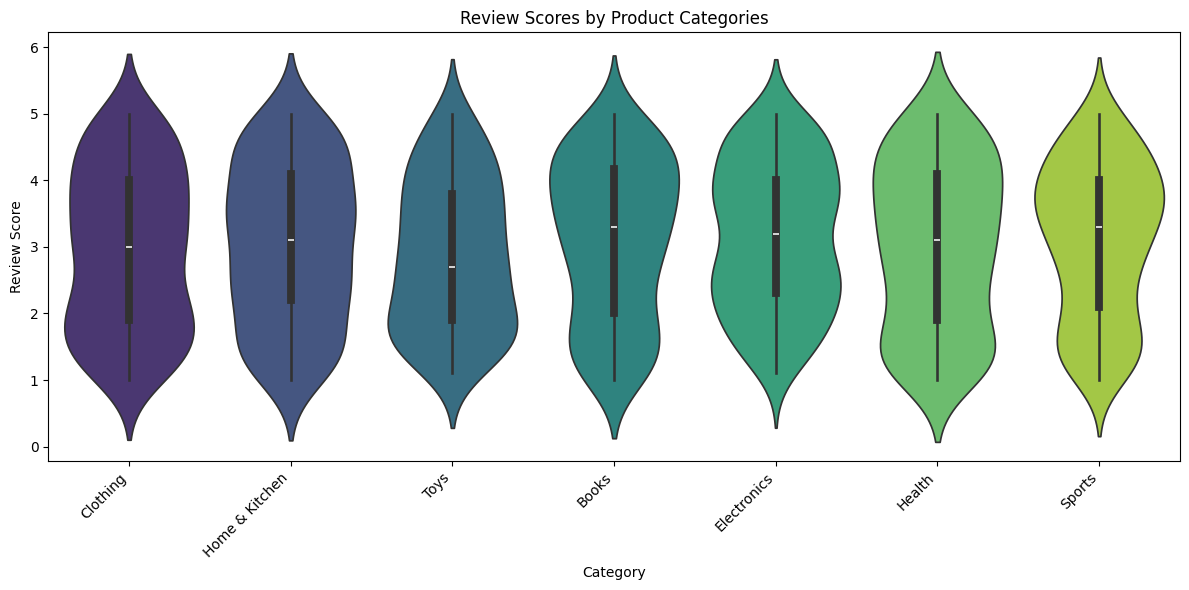

In [ ]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='review_score', data=data, hue='category', palette="viridis", legend=False)
plt.xlabel('Category')
plt.ylabel('Review Score')
plt.title('Review Scores by Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Fourth Question's Answer

In [ ]:

import plotly.graph_objects as go

sales_columns = [col for col in data.columns if col.startswith('sales_month_')]
monthly_sales = data[sales_columns].sum()

fig = go.Figure(go.Bar(
        x=list(range(1, len(monthly_sales) + 1)),
        y=monthly_sales.values,
        marker_color='skyblue'
))

fig.update_xaxes(
        tickmode='array',
        tickvals=list(range(1, len(monthly_sales) + 1)),
        ticktext=[f'{i+1}. Month' for i in range(len(monthly_sales))]
   )


fig.update_layout(
        title='Total Monthly Sales',
        xaxis_title='Months',
        yaxis_title='Total Number of Products Sold',
        yaxis_range=[400000, monthly_sales.max() + 50000],
        title_font=dict(size=16, color='#003366'),
        plot_bgcolor='#f0f0f0',
        paper_bgcolor='#ffffff',
        xaxis=dict(
            rangeslider=dict(visible=True)
        )
    )

fig.show()





Fifth Question's Answer

In [ ]:

import plotly.graph_objects as go

melted_data = pd.melt(data, id_vars=['product_id', 'product_name', 'category', 'price', 'review_score', 'review_count'],
                         var_name='month', value_name='sales')

melted_data['month'] = melted_data['month'].str.replace('sales_month_', '', regex=False)
melted_data = melted_data[melted_data['month'].str.isdigit()]
melted_data['month'] = melted_data['month'].astype(int)
category_monthly_sales = melted_data.groupby(['category', 'month'])['sales'].sum().reset_index()


fig = go.Figure()
for category in category_monthly_sales['category'].unique():
    category_data = category_monthly_sales[category_monthly_sales['category'] == category]
    fig.add_trace(go.Scatter(x=category_data['month'], y=category_data['sales'],
                                 mode='lines+markers',
                                 name=category,
                                 marker=dict(size=8)))


fig.update_layout(
  title='Monthly Sales Trends of Product Categories',
  xaxis_title='Month',
  yaxis_title='Total Sales',
  xaxis={'type': 'category'},
  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

